In [26]:
import requests
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import graphing

import plotly.express as px

import plotly.graph_objects as go


from datetime import datetime

from mpl_toolkits import mplot3d

import statsmodels.formula.api as smf
import missingno as msno
# from m1b_gradient_descent import gradient_descent
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score, make_scorer

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

In [ ]:
def download_file(url, filename):
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful
    response.raise_for_status()  # This will raise an exception for HTTP errors
    
    # Write the content to a file
    with open(filename, 'wb') as f:
        f.write(response.content)

url_1 = r"https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv"


download_file(url_1, 'daily-bike-share.csv')


In [2]:
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


GradientBoostingRegressor() 

MSE: 103892.40494786027
RMSE: 322.3234477165139
R2: 0.7963254607655003


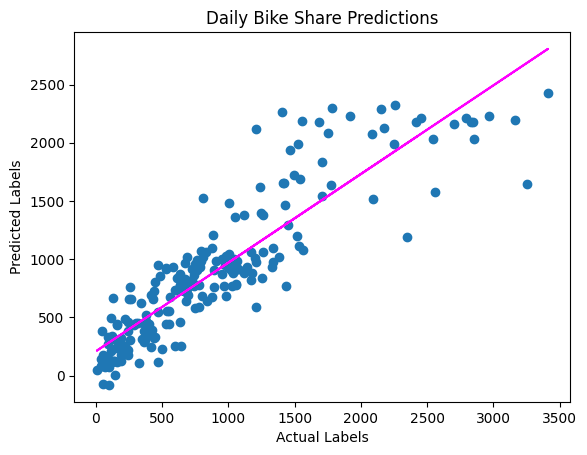

In [7]:
# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mse(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Optimize Hyperparameters

Take a look at the **GradientBoostingRegressor** estimator definition in the preceding output and note that it, like the other estimators we tried previously, includes a large number of parameters that control the way the model is trained. In machine learning, the term *parameters* refers to values that can be determined from data; values that you specify to affect the behavior of a training algorithm are more correctly referred to as *hyperparameters*.

The specific hyperparameters for an estimator vary based on the algorithm that the estimator encapsulates. In the case of the **GradientBoostingRegressor** estimator, the algorithm is an ensemble that combines multiple decision trees to create an overall predictive model. You can learn about the hyperparameters for this estimator in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

We won't go into the details of each hyperparameter here, but they work together to affect the way the algorithm trains a model. In many cases, the default values provided by Scikit-Learn will work well, but there could be some advantage in modifying hyperparameters to get better predictive performance or reduce training time.

So how do you know what hyperparameter values you should use? Well, in the absence of a deep understanding of how the underlying algorithm works, you'll need to experiment. Fortunately, SciKit-Learn provides a way to *tune* hyperparameters by trying multiple combinations and finding the best result for a given performance metric.

Let's try using a *grid search* approach to try combinations from a grid of possible values for the **learning_rate** and **n_estimators** hyperparameters of the **GradientBoostingRegressor** estimator.

c:\Users\danja\python_projects\dp_100_azure\.dp100_azure\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\danja\python_projects\dp_100_azure\.dp100_azure\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\danja\python_projects\dp_100_azure\.dp100_azure\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\danja\python_projects\dp_100_azure\.dp100_azure\Lib\site-packages\sklearn\metrics\_regression.py:1275: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
c:\Users\danja\python_projects\dp_100_azure\.dp100_azure\Lib\site-packages\sklearn\metrics\_regression.py:1275: RuntimeWarning: overflow 

Best parameter combination: {'learning_rate': 0.01, 'n_estimators': 500} 

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500) 

MSE: 111433.92226271318
RMSE: 333.81719887194726
R2: 0.7815407894028291


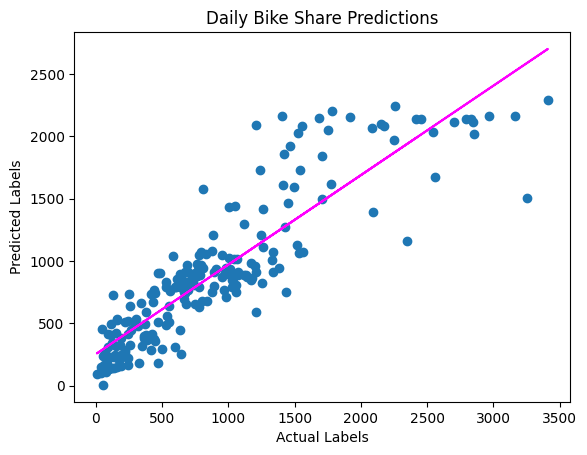

In [15]:
# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0, 5],
 'n_estimators' : [10, 50, 100, 150, 200, 500],
    # 'max_depth': [1, 3, 5, 7, 9],
    # 'min_samples_split': [2, 4, 6, 8, 10],
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse_value  = mean_squared_error(y_test, predictions)
print("MSE:", mse_value )
rmse = np.sqrt(mse_value )
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

To apply these preprocessing transformations to the bike rental, we'll make use of a Scikit-Learn feature named *pipelines*. These pipelines allow us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

>**Note**: The term *pipeline* is used extensively in machine learning, often to mean very different things! In this context, we're using it to refer to pipeline objects in Scikit-Learn, but you might see it used elsewhere to mean something else.

In [17]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 105524.4163971374
RMSE: 324.84521913849585
R2: 0.7931260047501759


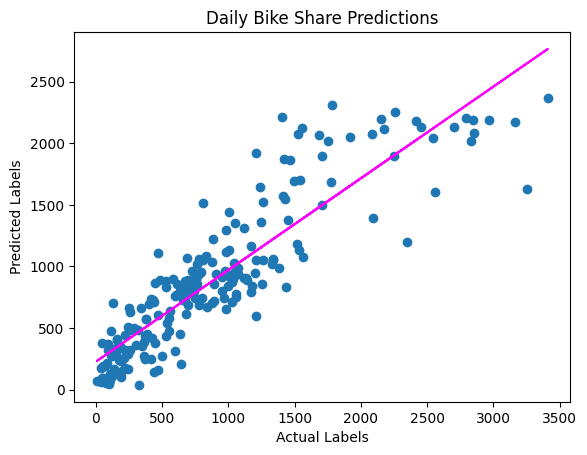

In [18]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 106715.52289272728
RMSE: 326.67341932383675
R2: 0.7907909152237544


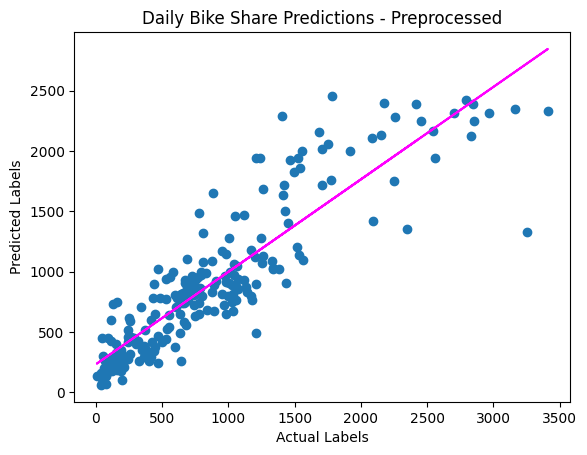

In [19]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
# Define preprocessing for numeric and categorical features
numeric_features = [6, 7, 8, 9]
categorical_features = [0, 1, 2, 3, 4, 5]

# Create the full preprocessing and training pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', Pipeline([('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])),
    ('regressor', GradientBoostingRegressor())
])

# Define parameters for grid search
# Note the parameter names are prefixed with 'regressor__' because that's the step name in our pipeline
params = {
    'regressor__learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0, 5],
    'regressor__n_estimators': [10, 50, 100, 150, 200, 500],
    
    # We can also add preprocessing parameters to search over
    'preprocessor__num__scaler__with_mean': [True, False],  # Try scaling with/without mean centering
    
}

# Create and run GridSearchCV
score = make_scorer(r2_score)
gridsearch = GridSearchCV(pipeline, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)

# Print results
print("Best parameter combination:", gridsearch.best_params_, "\n")
best_model = gridsearch.best_estimator_
print("Best model:", best_model, "\n")

# Get predictions
predictions = best_model.predict(X_test)

ValueError: Invalid parameter 'sparse' for estimator OneHotEncoder(handle_unknown='ignore'). Valid parameters are: ['categories', 'drop', 'dtype', 'feature_name_combiner', 'handle_unknown', 'max_categories', 'min_frequency', 'sparse_output'].

MSE: 111713.3300948628
RMSE: 334.23544111129627
R2: 0.780993027884553


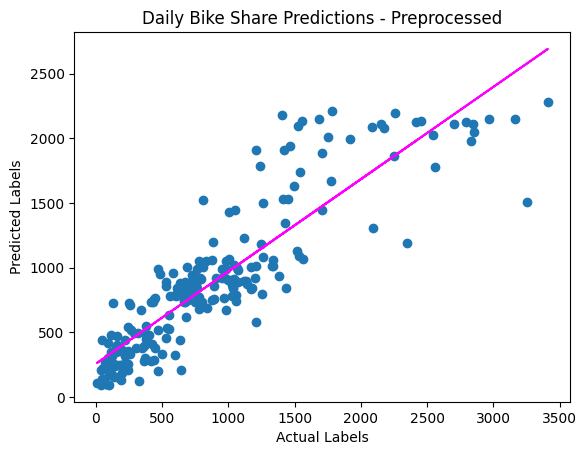

In [ ]:


# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [28]:
# Define our features
numeric_features = [6, 7, 8, 9]
categorical_features = [0, 1, 2, 3, 4, 5]

# Create our base preprocessor
preprocessor = ColumnTransformer([
    # Try different scalers for numeric features
    ('num', Pipeline([
        ('scaler', StandardScaler())  # We'll grid search over different scalers
    ]), numeric_features),
    # Keep categorical preprocessing simple
    ('cat', Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

# Create the main pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())  # Default regressor, will be replaced in grid search
])

# Define our parameter grid
params = {
    # Try different models
    'regressor': [
        GradientBoostingRegressor(),
        # RandomForestRegressor()
    ],
    # Try different scalers
    'preprocessor__num__scaler': [
        StandardScaler(),
        RobustScaler()
    ],
    # GradientBoosting parameters
    'regressor__learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0, 5],
    'regressor__n_estimators': [10, 50, 100, 150, 200, 500],
    
    # RandomForest parameters
    'regressor__max_depth': [3, 5, 7],
}

# Create and run GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    params,
    cv=5,
    scoring='r2',
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get predictions using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Best parameters: {'preprocessor__num__scaler': StandardScaler(), 'regressor': GradientBoostingRegressor(), 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 50}
Best cross-validation score: 0.7738043735761723


c:\Users\danja\python_projects\dp_100_azure\.dp100_azure\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [ 1.18628935e-002  6.68367620e-002  1.29365358e-001  1.85468147e-001
  2.36207402e-001  4.55733547e-001  1.31438215e-002  7.26541691e-002
  1.40319160e-001  2.01565819e-001  2.56945566e-001  4.89487988e-001
  1.33363087e-002  7.39093618e-002  1.42663454e-001  2.04536781e-001
  2.60585812e-001  4.91237101e-001  1.29909920e-001  4.56879317e-001
  6.28396372e-001  7.00802110e-001  7.33377461e-001  7.70290427e-001
  1.41104952e-001  4.90279526e-001  6.66731489e-001  7.29743617e-001
  7.58869568e-001  7.70948903e-001  1.43209636e-001  4.92891680e-001
  6.57917233e-001  7.12796040e-001  7.34814096e-001  7.41792462e-001
  6.38333670e-001  7.73804374e-001  7.73483870e-001  7.70980086e-001
  7.67493989e-001  7.54030924e-001  6.77774057e-001  7.63345692e-001
  7.56717637e-001  7.55779471e-001  7.55609853e-001  7.56996685e-

MSE: 112656.18777848824
RMSE: 335.6429468624184
R2: 0.7791446145729881


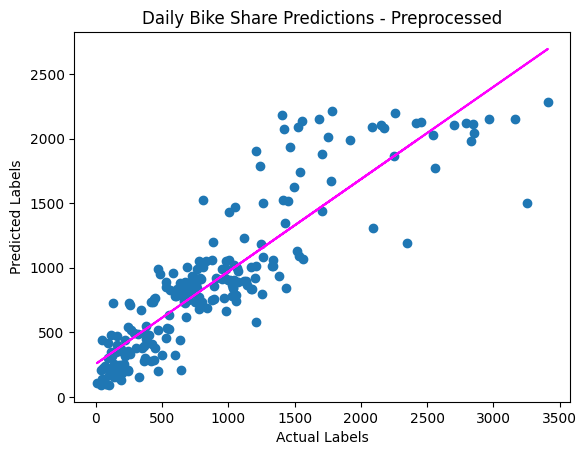

In [29]:


# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()